# Machine Learning Project

### Company Bankruptcy Prediction

Names:    
    - Denis Mugisha   
    - Liu Guangqiang   
    - Rachel Fanti   
    
Dataset: https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction

Data: May/2021

## Libraries

In [88]:
#!pip install imblearn
#!pip install pydotplus==2.0.2

In [89]:
# Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statistic funtions
from collections import Counter

# Preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation of the model
from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score

# To handle imbalanced data
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler
from imblearn.over_sampling import RandomOverSampler

from ipynb.fs.full.evaluation_functions import evaluation_scenario, plot_roc_curve, print_confusion_matrix

## Reading data

In [90]:
# load dataset
bankrupt = pd.read_csv('./data/data.csv', header=0)
df_feat = pd.read_csv('./data/bankruptcy.csv')
df_feat

,Unnamed: 0,features,importance,select_tree,rank_rfecv,selected_rfecv,corr
0,47,Inventory Turnover Rate (times),0.001875,True,1,True,0.012556
1,71,Quick Asset Turnover Rate,0.000000,True,1,True,0.036946
2,61,Inventory/Working Capital,0.025644,True,1,True,0.055539
3,56,Cash/Total Assets,0.023681,True,1,True,0.150828
4,55,Current Assets/Total Assets,0.003832,True,1,True,0.044232
...,...,...,...,...,...,...,...
90,2,ROA(B) before interest and depreciation after...,0.000000,False,71,False,0.224163
91,48,Fixed Assets Turnover Frequency,0.000000,True,72,False,0.047546
92,32,Current Ratio,0.000000,False,73,False,0.189644
93,1,ROA(A) before interest and % after tax,0.000000,False,74,False,0.222410


In [91]:
# Select the features to train the model.
col = df_feat[df_feat['selected_rfecv']==True]['features'].values
col = np.insert(col, 0, 'Bankrupt?')
col

array(['Bankrupt?', ' Inventory Turnover Rate (times)',
       ' Quick Asset Turnover Rate', ' Inventory/Working Capital',
       ' Cash/Total Assets', ' Current Assets/Total Assets',
       ' Allocation rate per person',
       ' Net profit before tax/Paid-in capital', ' Borrowing dependency',
       ' Net worth/Assets', ' Interest Expense Ratio',
       ' Cash Reinvestment %', ' Net Value Growth Rate',
       ' Net Value Per Share (B)', ' Current Liability to Current Assets',
       ' Interest-bearing debt interest rate',
       " Net Income to Stockholder's Equity",
       ' Degree of Financial Leverage (DFL)',
       ' Total assets to GNP price',
       ' Non-industry income and expenditure/revenue',
       ' Operating Expense Rate',
       ' Research and development expense rate'], dtype=object)

In [92]:
df = bankrupt.loc[:, col]
df

,Bankrupt?,Inventory Turnover Rate (times),Quick Asset Turnover Rate,Inventory/Working Capital,Cash/Total Assets,Current Assets/Total Assets,Allocation rate per person,Net profit before tax/Paid-in capital,Borrowing dependency,Net worth/Assets,...,Net Value Growth Rate,Net Value Per Share (B),Current Liability to Current Assets,Interest-bearing debt interest rate,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Total assets to GNP price,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate
0,1,1.820926e-04,6.550000e+09,0.276920,0.004094,0.190643,0.037135,0.137757,0.390284,0.792424,...,0.000327,0.147950,0.118250,7.250725e-04,0.827890,0.026601,0.009219,0.302646,1.256969e-04,0.000000e+00
1,1,9.360000e+09,7.700000e+09,0.289642,0.014948,0.182419,0.012335,0.168962,0.376760,0.828824,...,0.000443,0.182251,0.047775,6.470647e-04,0.839969,0.264577,0.008323,0.303556,2.897851e-04,0.000000e+00
2,1,6.500000e+07,1.022676e-03,0.277456,0.000991,0.602806,0.141016,0.148036,0.379093,0.792484,...,0.000396,0.177911,0.025346,7.900790e-04,0.836774,0.026555,0.040003,0.302035,2.361297e-04,2.550000e+07
3,1,7.130000e+09,6.050000e+09,0.276580,0.018851,0.225815,0.021320,0.147561,0.379743,0.848535,...,0.000382,0.154187,0.067250,4.490449e-04,0.834697,0.026697,0.003252,0.303350,1.078888e-04,0.000000e+00
4,1,1.633674e-04,5.050000e+09,0.287913,0.014161,0.358380,0.023988,0.167461,0.375025,0.893491,...,0.000439,0.167502,0.047725,6.860686e-04,0.839973,0.024752,0.003878,0.303475,7.890000e+09,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,4.030000e+07,1.244230e-04,0.277543,0.099481,0.578455,0.006312,0.171111,0.373823,0.875382,...,0.000450,0.175045,0.027951,1.790179e-04,0.840359,0.027064,0.000466,0.303510,1.510213e-04,4.500000e+09
6815,0,9.940000e+09,1.173396e-04,0.277368,0.080337,0.444043,0.003401,0.171805,0.372505,0.900747,...,0.000445,0.181324,0.031470,2.370237e-04,0.840306,0.027009,0.001959,0.303520,5.220000e+09,1.440000e+09
6816,0,2.797309e-04,1.749713e-04,0.277022,0.412885,0.496053,0.002774,0.172287,0.369637,0.961061,...,0.000435,0.269521,0.007542,0.000000e+00,0.840138,0.026791,0.002840,0.303512,2.509312e-04,1.039086e-04
6817,0,4.550000e+09,1.351937e-04,0.277353,0.112238,0.564439,0.007489,0.182498,0.369649,0.913021,...,0.000529,0.213392,0.022916,2.110211e-04,0.841084,0.026822,0.002837,0.303498,1.236154e-04,2.510000e+09


### Splitting data into train/ test sets

In [93]:
#split dataset in features and target variable
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [94]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [95]:
print(f"y_train = {Counter (y_train)}")
print(f"                   0: {Counter(y_train)[0]/len(y_train):.0%},  1: {Counter(y_train)[1]/len(y_train):.0%}")
print()
print(f"y_test = {Counter (y_test)}")
print(f"                  0: {Counter(y_test)[0]/len(y_test):.0%},  1: {Counter(y_test)[1]/len(y_test):.0%}")

y_train = Counter({0: 4619, 1: 154})
                   0: 97%,  1: 3%

y_test = Counter({0: 1980, 1: 66})
                  0: 97%,  1: 3%


## Models to be analysed: Logistic Regression, Decision Forest and Decision Tree

In [96]:
df_results = pd.DataFrame(columns = ['Scenarios','#Features', 'Train/Test', 'Acc', 'Bal_Acc','M_P','M_R', 'M_F1', "P0", "P1", "R0", "R1", 'MSE', 'Auc'])
print (df_results)

Empty DataFrame
Columns: [Scenarios, #Features, Train/Test, Acc, Bal_Acc, M_P, M_R, M_F1, P0, P1, R0, R1, MSE, Auc]
Index: []


We will use a dictionary and a list to continuously store the results of our experiments and show them as a pandas dataframe.

In [97]:
# List and dictionary to store the results of our analysis
index = []
scores = {"Accuracy": [], "Balanced accuracy": []}

We will define 2 scores: accuracy and balanced accuracy

In [98]:
scoring = ["accuracy", "balanced_accuracy"]

**Logistic regression classifier**

In [99]:
lr_clf = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

index += ["Logistic regression"]
cv_result = cross_validate(lr_clf, X_train, y_train, scoring=scoring) 
# Cross_validate: for int/None inputs, if the estimator is a classifier and y is either binary or multiclass, 
                # StratifiedKFold is used.
scores["Accuracy"].append(round(cv_result["test_accuracy"].mean(),2))
scores["Balanced accuracy"].append(round(cv_result["test_balanced_accuracy"].mean(),2))

In [100]:
df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy
Logistic regression,0.97,0.56


**RandomForestClassifier**

In [101]:
rf_clf = make_pipeline(RandomForestClassifier(random_state=42))

index += ["Random forest"]
cv_result = cross_validate(rf_clf, X_train, y_train, scoring=scoring)
scores["Accuracy"].append(round(cv_result["test_accuracy"].mean(),2))
scores["Balanced accuracy"].append(round(cv_result["test_balanced_accuracy"].mean(),2))

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy
Logistic regression,0.97,0.56
Random forest,0.97,0.60


**DT Classifier**

In [102]:
dt_clf = make_pipeline(DecisionTreeClassifier(random_state=42))

index += ["Decision Tree"]
cv_result = cross_validate(dt_clf, X_train, y_train, scoring=scoring)
scores["Accuracy"].append(round(cv_result["test_accuracy"].mean(),2))
scores["Balanced accuracy"].append(round(cv_result["test_balanced_accuracy"].mean(),2))

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy
Logistic regression,0.97,0.56
Random forest,0.97,0.60
Decision Tree,0.96,0.69


## Use class_weight

Most of the models in scikit-learn have a parameter class_weight. This parameter will affect the computation of the loss in linear model or the criterion in the tree-based model to penalize differently a false classification from the minority and majority class. We can set class_weight="balanced" such that the weight applied is inversely proportional to the class frequency. We test this parametrization in both linear model and tree-based model.

In [103]:
lr_clf.set_params(logisticregression__class_weight="balanced")
# classification??

index += ["Logistic regression with balanced class weights"]
cv_result = cross_validate(lr_clf, X_train, y_train, scoring=scoring)
scores["Accuracy"].append(round(cv_result["test_accuracy"].mean(),2))
scores["Balanced accuracy"].append(round(cv_result["test_balanced_accuracy"].mean(),2))

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy
Logistic regression,0.97,0.56
Random forest,0.97,0.60
Decision Tree,0.96,0.69
Logistic regression with balanced class weights,0.86,0.85


In [104]:
lr_clf.fit(X_train, y_train)
predict_test = lr_clf.predict(X_test)
balanced_accuracy_score(y_test, predict_test)

0.8469696969696969

In [105]:
evaluation_scenario(lr_clf, y_train, y_test, lr_clf.predict(X_train), predict_test, df_results, 'LR-SW', 22)

Confusion matrix - Test:


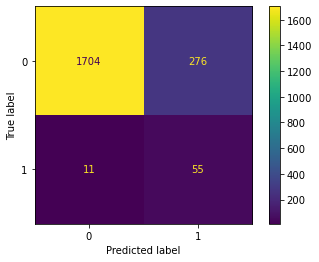

In [106]:
print_confusion_matrix(lr_clf, X_test, y_test,'Test')

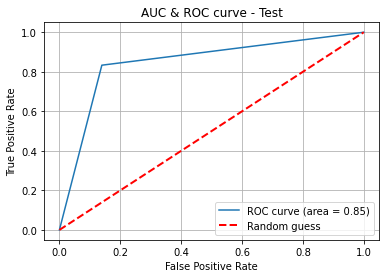

In [107]:
plot_roc_curve(y_test, predict_test, 'Test')

In [108]:
rf_clf.set_params(randomforestclassifier__class_weight="balanced")

index += ["Random forest with balanced class weights"]
cv_result = cross_validate(rf_clf, X_train, y_train, scoring=scoring)
scores["Accuracy"].append(round(cv_result["test_accuracy"].mean(),2))
scores["Balanced accuracy"].append(round(cv_result["test_balanced_accuracy"].mean(),2))

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy
Logistic regression,0.97,0.56
Random forest,0.97,0.60
Decision Tree,0.96,0.69
Logistic regression with balanced class weights,0.86,0.85
Random forest with balanced class weights,0.97,0.56


In [109]:
dt_clf.set_params(decisiontreeclassifier__class_weight="balanced")

index += ["Decisin tree with balanced class weights"]
cv_result = cross_validate(dt_clf, X_train, y_train, scoring=scoring)
scores["Accuracy"].append(round(cv_result["test_accuracy"].mean(),2))
scores["Balanced accuracy"].append(round(cv_result["test_balanced_accuracy"].mean(),2))

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy
Logistic regression,0.97,0.56
Random forest,0.97,0.60
Decision Tree,0.96,0.69
Logistic regression with balanced class weights,0.86,0.85
Random forest with balanced class weights,0.97,0.56
Decisin tree with balanced class weights,0.95,0.66


## Resample the training set during learning

In [110]:
lr_clf = make_pipeline_with_sampler(
    RandomOverSampler(random_state=42),
    LogisticRegression(max_iter=1000),
)

In [111]:
index += ["Over-sampling + Logistic regression"]
cv_result = cross_validate(lr_clf, X_train, y_train, scoring=scoring)
scores["Accuracy"].append(round(cv_result["test_accuracy"].mean(),2))
scores["Balanced accuracy"].append(round(cv_result["test_balanced_accuracy"].mean(),2))

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy
Logistic regression,0.97,0.56
Random forest,0.97,0.60
Decision Tree,0.96,0.69
Logistic regression with balanced class weights,0.86,0.85
Random forest with balanced class weights,0.97,0.56
Decisin tree with balanced class weights,0.95,0.66
Over-sampling + Logistic regression,0.62,0.51


In [112]:
rf_clf = make_pipeline_with_sampler(
    RandomOverSampler(random_state=42),
    RandomForestClassifier(random_state=42, n_jobs=2),
)

In [113]:
index += ["Over-sampling + Random forest"]
cv_result = cross_validate(rf_clf, X_train, y_train, scoring=scoring)
scores["Accuracy"].append(round(cv_result["test_accuracy"].mean(),2))
scores["Balanced accuracy"].append(round(cv_result["test_balanced_accuracy"].mean(),2))

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy
Logistic regression,0.97,0.56
Random forest,0.97,0.60
Decision Tree,0.96,0.69
Logistic regression with balanced class weights,0.86,0.85
Random forest with balanced class weights,0.97,0.56
Decisin tree with balanced class weights,0.95,0.66
Over-sampling + Logistic regression,0.62,0.51
Over-sampling + Random forest,0.97,0.61


In [114]:
dt_clf = make_pipeline_with_sampler(
    RandomOverSampler(random_state=42),
    DecisionTreeClassifier(random_state=42))

In [115]:
index += ["Over-sampling + Decision Tree"]
cv_result = cross_validate(dt_clf, X_train, y_train, scoring=scoring)
scores["Accuracy"].append(round(cv_result["test_accuracy"].mean(),2))
scores["Balanced accuracy"].append(round(cv_result["test_balanced_accuracy"].mean(),2))

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy
Logistic regression,0.97,0.56
Random forest,0.97,0.60
Decision Tree,0.96,0.69
Logistic regression with balanced class weights,0.86,0.85
Random forest with balanced class weights,0.97,0.56
Decisin tree with balanced class weights,0.95,0.66
Over-sampling + Logistic regression,0.62,0.51
Over-sampling + Random forest,0.97,0.61
Over-sampling + Decision Tree,0.95,0.63


## Use of specific balanced algorithms from imbalanced-learn, bagging and boosting

A balanced random forest classifier.

A balanced random forest randomly under-samples each boostrap sample to balance it.

In [116]:
from imblearn.ensemble import BalancedRandomForestClassifier

rf_clf = make_pipeline(
    BalancedRandomForestClassifier(random_state=42, n_jobs=2),
)

In [117]:
index += ["Balanced random forest"]
cv_result = cross_validate(rf_clf, X_train, y_train, scoring=scoring)
scores["Accuracy"].append(round(cv_result["test_accuracy"].mean(),2))
scores["Balanced accuracy"].append(round(cv_result["test_balanced_accuracy"].mean(),2))

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy
Logistic regression,0.97,0.56
Random forest,0.97,0.60
Decision Tree,0.96,0.69
Logistic regression with balanced class weights,0.86,0.85
Random forest with balanced class weights,0.97,0.56
Decisin tree with balanced class weights,0.95,0.66
Over-sampling + Logistic regression,0.62,0.51
Over-sampling + Random forest,0.97,0.61
Over-sampling + Decision Tree,0.95,0.63
Balanced random forest,0.85,0.86


In [118]:
rf_clf.fit(X_train, y_train)
predict_test = rf_clf.predict(X_test)
balanced_accuracy_score(y_test, predict_test)

0.8888888888888888

In [119]:
evaluation_scenario(rf_clf, y_train, y_test, rf_clf.predict(X_train), predict_test, df_results, 'RF-Bal', 22)

Confusion matrix - Test:


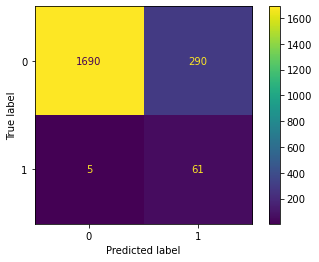

In [121]:
print_confusion_matrix(rf_clf, X_test, y_test,'Test')

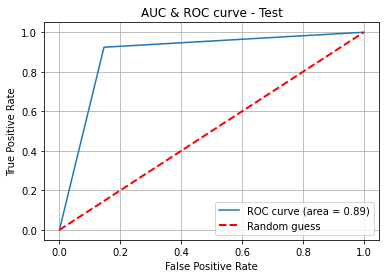

In [122]:
plot_roc_curve(y_test, predict_test, 'Test')

The performance with the BalancedRandomForestClassifier is better than applying a single random under-sampling. 

We will use a gradient-boosting classifier within a BalancedBaggingClassifier.

In [123]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.ensemble import BalancedBaggingClassifier

bag_clf = make_pipeline(
    BalancedBaggingClassifier(
        base_estimator=HistGradientBoostingClassifier(random_state=42),
        n_estimators=10,
        random_state=42,
        n_jobs=2,
    ),
)

index += ["Balanced bag of histogram gradient boosting"]
cv_result = cross_validate(bag_clf, X_train, y_train, scoring=scoring)
scores["Accuracy"].append(round(cv_result["test_accuracy"].mean(),2))
scores["Balanced accuracy"].append(round(cv_result["test_balanced_accuracy"].mean(),2))

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy
Logistic regression,0.97,0.56
Random forest,0.97,0.60
Decision Tree,0.96,0.69
Logistic regression with balanced class weights,0.86,0.85
Random forest with balanced class weights,0.97,0.56
Decisin tree with balanced class weights,0.95,0.66
Over-sampling + Logistic regression,0.62,0.51
Over-sampling + Random forest,0.97,0.61
Over-sampling + Decision Tree,0.95,0.63
Balanced random forest,0.85,0.86


In [124]:
bag_clf.fit(X_train, y_train)
predict_test = bag_clf.predict(X_test)
balanced_accuracy_score(y_test, predict_test)

0.8585858585858586

In [125]:
evaluation_scenario(bag_clf, y_train, y_test, bag_clf.predict(X_train), predict_test, df_results, 'BBC-Boo', 22)

Confusion matrix - Test:


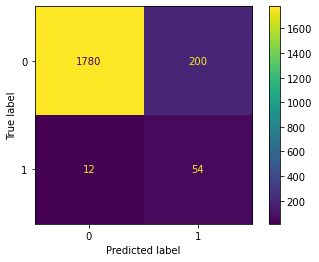

In [126]:
print_confusion_matrix(bag_clf, X_test, y_test,'Test')

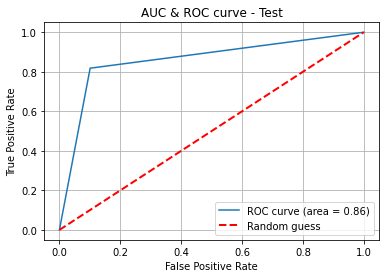

In [127]:
plot_roc_curve(y_test, predict_test, 'Test')

In [128]:
df_results

,Scenarios,#Features,Train/Test,Acc,Bal_Acc,M_P,M_R,M_F1,P0,P1,R0,R1,MSE,Auc
1,LR-SW,22 features,Train,0.86,0.87,0.58,0.87,0.60,1.00,0.17,0.86,0.88,0.144,0.87
2,LR-SW,22 features,Val/Test,0.86,0.85,0.58,0.85,0.60,0.99,0.17,0.86,0.83,0.140,0.85
3,RF-Bal,22 features,Train,0.86,0.93,0.59,0.93,0.62,1.00,0.19,0.86,1.00,0.138,0.93
4,RF-Bal,22 features,Val/Test,0.86,0.89,0.59,0.89,0.61,1.00,0.17,0.85,0.92,0.144,0.89
5,BBC-Boo,22 features,Train,0.90,0.93,0.62,0.93,0.67,1.00,0.25,0.90,0.97,0.096,0.93
6,BBC-Boo,22 features,Val/Test,0.90,0.86,0.60,0.86,0.64,0.99,0.21,0.90,0.82,0.104,0.86
